Cleaning the dataset from missing values in heading

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [41]:
ais = pd.read_csv('data/datasets/ais_train.csv', sep='|')

ais['time'] = pd.to_datetime(ais['time'])
#convert lat from object to int/ remember to add to initial data exploration 
ais['latitude'] = pd.to_numeric(ais['latitude'], errors='coerce')

ais.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3


In [42]:
port_id_mapping = {port_id: idx for idx, port_id in enumerate(ais['portId'].unique())}
ais['portId'] = ais['portId'].map(port_id_mapping)
# ports['portId'] = ports['portId'].map(port_id_mapping)

vessel_id_mapping = {vessel_id: idx for idx, vessel_id in enumerate(ais['vesselId'].unique())}
ais['vesselId'] = ais['vesselId'].map(vessel_id_mapping)
# vessels['vesselId'] = vessels['vesselId'].map(vessel_id_mapping)
# test['vesselId'] = test['vesselId'].map(vessel_id_mapping)

# shipping_line_id_mapping = {shipping_line_id: idx for idx, shipping_line_id in enumerate(vessels['shippingLineId'].unique())}
# vessels['shippingLineId'] = vessels['shippingLineId'].map(shipping_line_id_mapping)


ais.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,0,0
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,1,1
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,2,2
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,3,3
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,4,4


Check how many vessels have missing heading 

     vesselId  missing_headings
622       622               921
542       542               839
334       334               501
635       635               466
6           6               362
..        ...               ...
266       266                 0
267       267                 0
268       268                 0
269       269                 0
687       687                 0

[688 rows x 2 columns]


C:\Users\ingvi\AppData\Local\Temp\ipykernel_33936\3496592661.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_headings_count.sort_values('missing_headings', ascending=False),


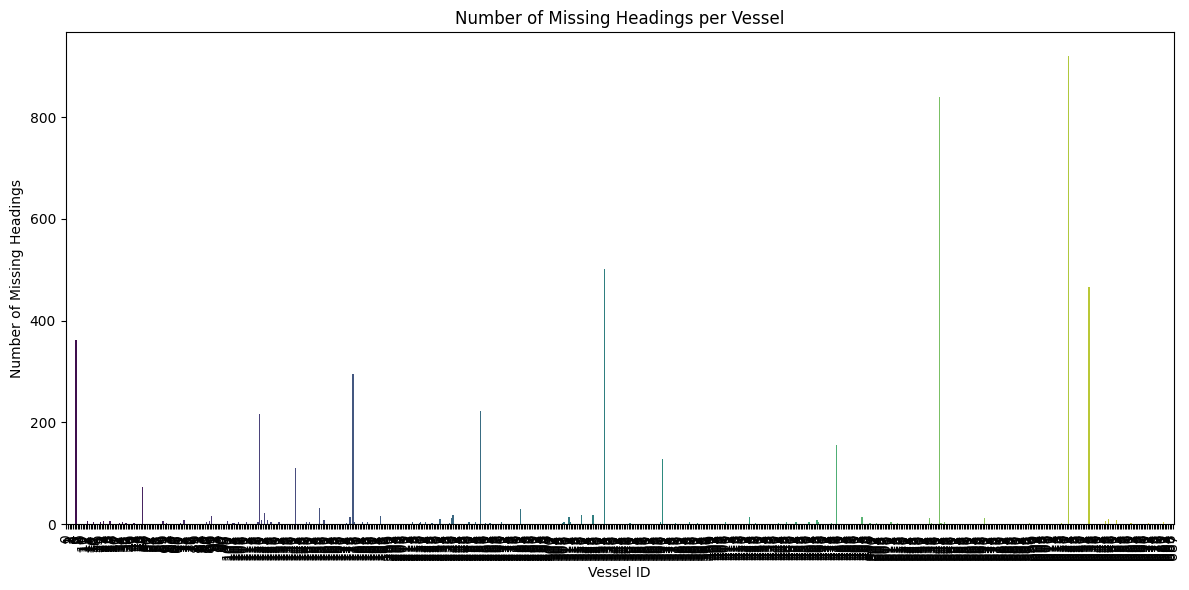

C:\Users\ingvi\AppData\Local\Temp\ipykernel_33936\3496592661.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=headings_summary.sort_values('missing_to_total_ratio', ascending=False),


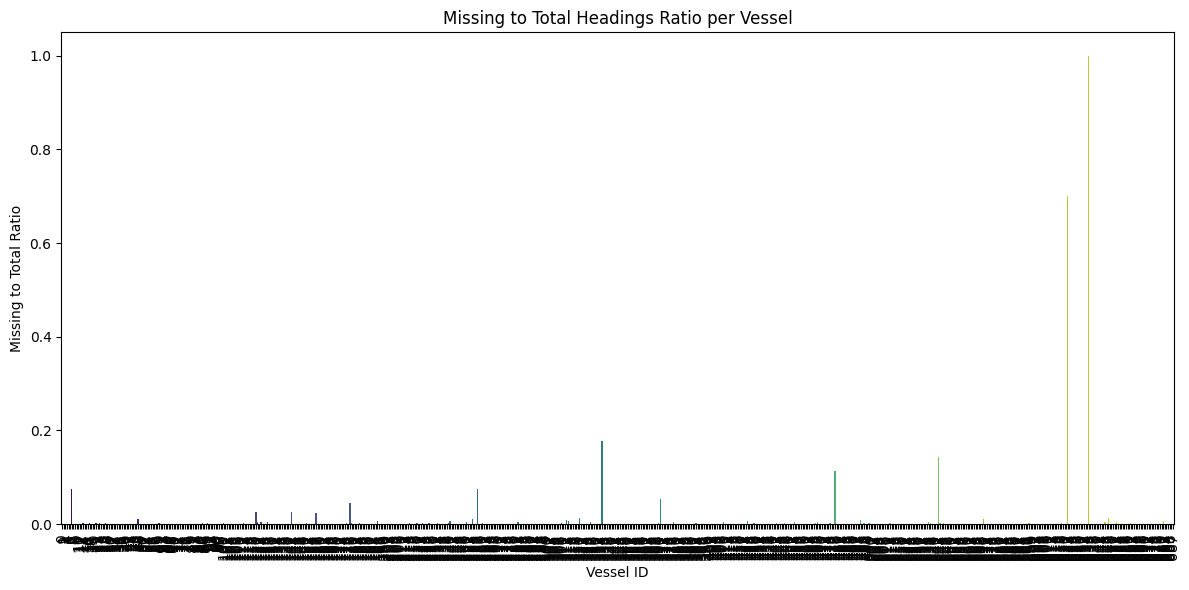

In [44]:
ais['heading'] = ais['heading'].replace(511, pd.NA)


# Step 2: Count the number of missing headings for each vessel
missing_headings_count = ais.groupby('vesselId')['heading'].apply(lambda x: x.isna().sum()).reset_index()
missing_headings_count = missing_headings_count.rename(columns={'heading': 'missing_headings'})
missing_headings_count = missing_headings_count.sort_values(by='missing_headings', ascending=False)
print(missing_headings_count)

total_headings_count = ais.groupby('vesselId').size().reset_index(name='total_headings')
total_headings_count = total_headings_count.rename(columns={'heading': 'total_headings'})

headings_summary = pd.merge(missing_headings_count, total_headings_count, on='vesselId')
headings_summary['missing_to_total_ratio'] = headings_summary['missing_headings'] / headings_summary['total_headings']
headings_summary = headings_summary.sort_values(by='missing_to_total_ratio', ascending=False)


# Sort the vessels by the number of missing headings and print the first 10
sorted_missing_headings = missing_headings_count.sort_values(by='missing_headings', ascending=False)


# Step 3: Visualize the missing headings per vessel
plt.figure(figsize=(12, 6))
sns.barplot(data=missing_headings_count.sort_values('missing_headings', ascending=False),
             x='vesselId', y='missing_headings', palette='viridis')

plt.title('Number of Missing Headings per Vessel')
plt.xlabel('Vessel ID')
plt.ylabel('Number of Missing Headings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=headings_summary.sort_values('missing_to_total_ratio', ascending=False),
            x='vesselId', y='missing_to_total_ratio', palette='viridis')

plt.title('Missing to Total Headings Ratio per Vessel')
plt.xlabel('Vessel ID')
plt.ylabel('Missing to Total Ratio')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Missing Heading in Consecutive Order
- as seen in the cell above some vessels miss a significant part of their headings

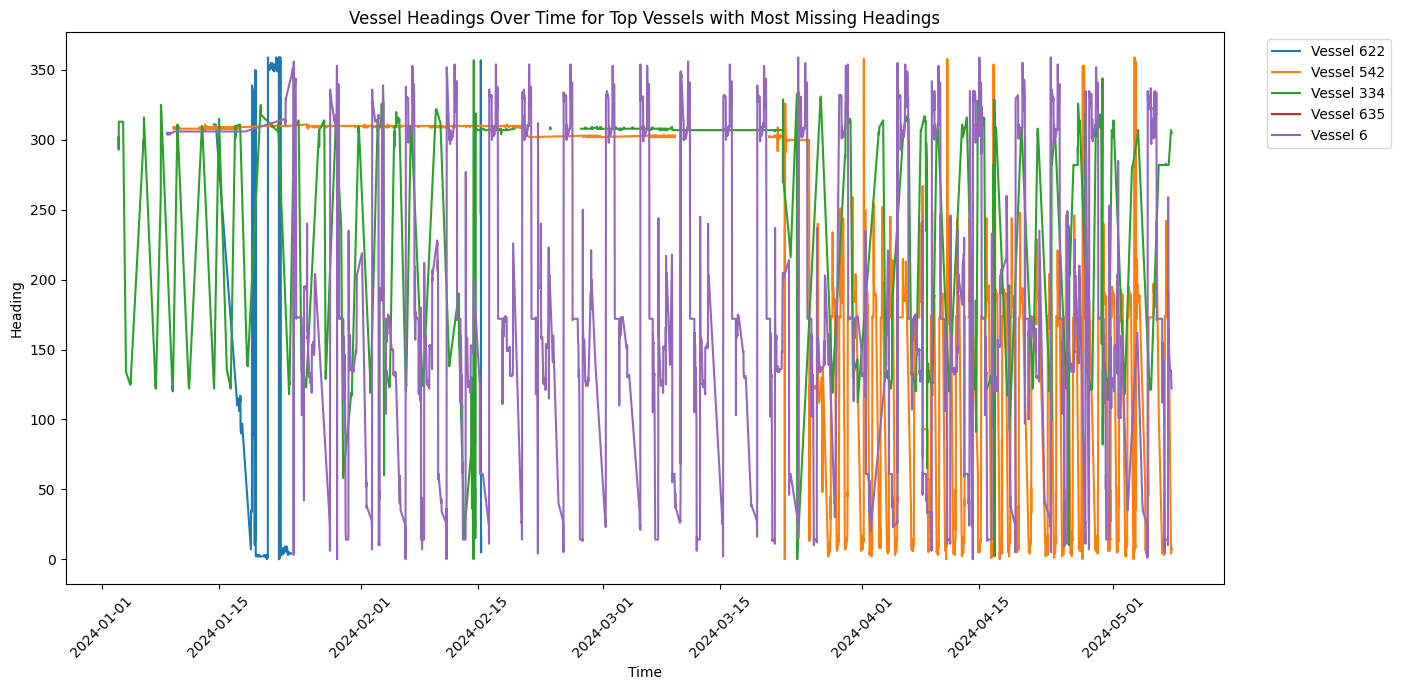

In [45]:

ais['heading'] = pd.to_numeric(ais['heading'], errors='coerce')

# Get the vessel IDs with the most missing headings
top_vessels = sorted_missing_headings.head(5)['vesselId']

# Plot vessel headings over time for the top vessels with the most missing headings
plt.figure(figsize=(14, 7))
for vessel_id in top_vessels:
    vessel_data = ais[ais['vesselId'] == vessel_id]
    plt.plot(vessel_data['time'], vessel_data['heading'], label=f'Vessel {vessel_id}')

plt.title('Vessel Headings Over Time for Top Vessels with Most Missing Headings')
plt.xlabel('Time')
plt.ylabel('Heading')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
ais = ais.sort_values(by=['vesselId', 'time'])

def calculate_heading(lat1, lon1, lat2, lon2):
    """
    Calculate the heading from (lat1, lon1) to (lat2, lon2).
    """
    delta_lon = np.radians(lon2 - lon1)
    
    x = np.sin(delta_lon) * np.cos(np.radians(lat2))
    y = (np.cos(np.radians(lat1)) * np.sin(np.radians(lat2)) -
         np.sin(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(delta_lon))
    
    heading = np.arctan2(x, y)
    heading = np.degrees(heading)  # Convert from radians to degrees
    heading = (heading + 360) % 360  # Normalize to 0-360 degrees
    return heading

# Step 2: Group by vessel and impute missing heading values for each vessel individually
def impute_heading(group):
    # Interpolate heading values within each vessel's time series
    group['heading'] = group['heading'].interpolate(method='linear', limit_direction='both')
    
    # Fill remaining missing values at the edges with forward/backward fill
    group['heading'] = group['heading'].fillna(method='ffill').fillna(method='bfill')
    
    # Check if headings are still missing
    if group['heading'].isna().all():
        # If all headings are missing, calculate headings based on lat/lon
        for i in range(len(group) - 1):
            if pd.isna(group['heading'].iloc[i]):  # If the heading is missing
                lat1 = group['latitude'].iloc[i]
                lon1 = group['longitude'].iloc[i]
                lat2 = group['latitude'].iloc[i + 1]
                lon2 = group['longitude'].iloc[i + 1]
                
                # Calculate the heading from lat/lon
                heading = calculate_heading(lat1, lon1, lat2, lon2)
                group.loc[group.index[i], 'heading'] = heading
                
        # Handle the last value if still NaN
        if pd.isna(group['heading'].iloc[-1]):
            group['heading'].iloc[-1] = group['heading'].ffill().iloc[-1]  # Forward fill for the last item
    
    return group

# Apply the imputation function to each vessel group
ais_imputed = ais.groupby('vesselId', group_keys=False).apply(impute_heading)

# Step 3: Handle vessels that are missing all headings
all_missing_vessels = ais_imputed.groupby('vesselId')['heading'].apply(lambda x: x.isna().all()).reset_index()
missing_all = all_missing_vessels[all_missing_vessels['heading'] == True]['vesselId'].tolist()

# Fill in these vessels with a default value (e.g., 0, or based on some logic)
ais_imputed.loc[ais_imputed['vesselId'].isin(missing_all), 'heading'] = 0  # Replace with an appropriate value

# Step 4: Check if any headings are still missing
print(ais_imputed['heading'].isna().sum())

# Add the imputed values to the original DataFrame
ais['imputed_heading'] = ais_imputed['heading']

C:\Users\ingvi\AppData\Local\Temp\ipykernel_33936\74960273.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['heading'] = group['heading'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ingvi\AppData\Local\Temp\ipykernel_33936\74960273.py:42: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the orig

0


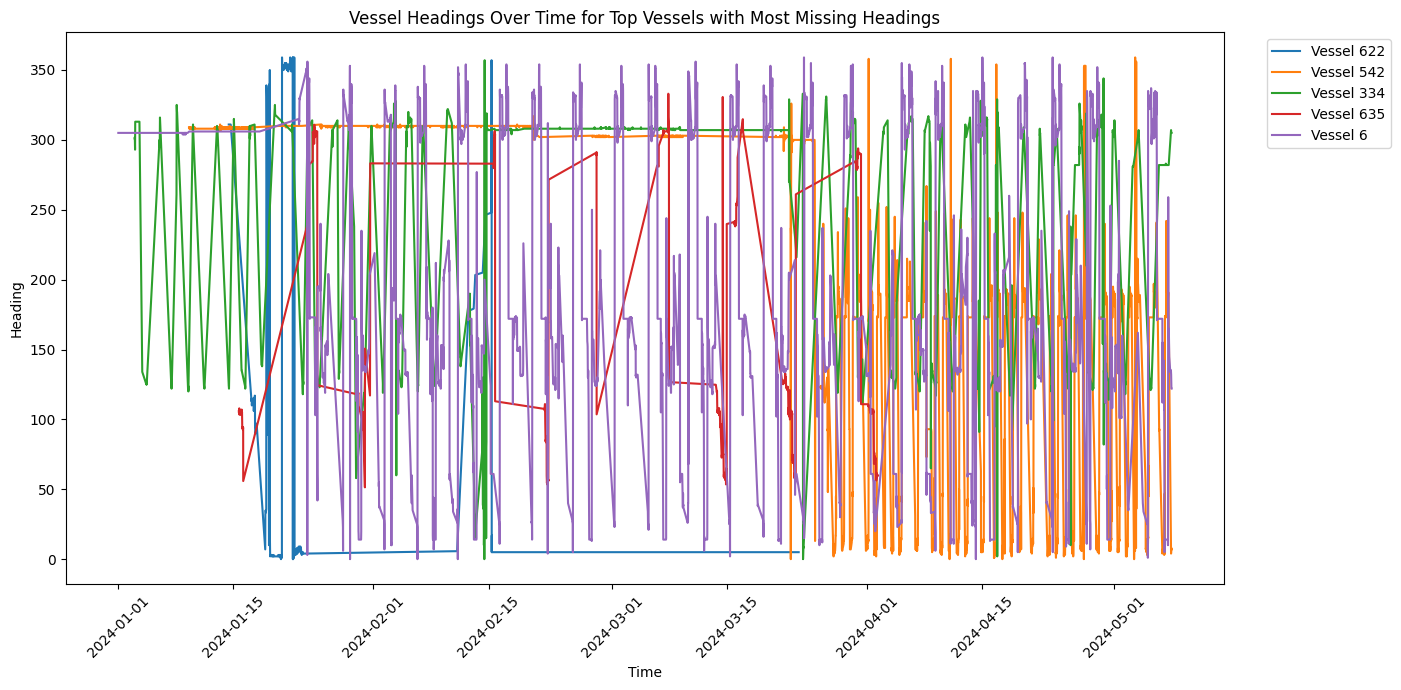

In [47]:

ais['imputed_heading'] = pd.to_numeric(ais['imputed_heading'], errors='coerce')

# Get the vessel IDs with the most missing headings
top_vessels = sorted_missing_headings.head(5)['vesselId']

# Plot vessel headings over time for the top vessels with the most missing headings
plt.figure(figsize=(14, 7))
for vessel_id in top_vessels:
    vessel_data = ais[ais['vesselId'] == vessel_id]
    plt.plot(vessel_data['time'], vessel_data['imputed_heading'], label=f'Vessel {vessel_id}')

plt.title('Vessel Headings Over Time for Top Vessels with Most Missing Headings')
plt.xlabel('Time')
plt.ylabel('Heading')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
from sklearn.cluster import KMeans



# Prepare data for clustering
clustering_data = ais.groupby('vesselId').agg({'sog': 'mean', 'heading': 'mean'}).reset_index()

# K-means clustering
kmeans = KMeans(n_clusters=5)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data[['sog', 'heading']])

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=clustering_data, x='speed', y='heading', hue='cluster', palette='viridis')
plt.title('Vessel Clusters based on Speed and Heading')
plt.show()

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values